<a href="https://colab.research.google.com/github/Crispis723/numpy/blob/main/Clasificacion_ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación: Primeros pasos**

En este proyecto, analizaremos datos de una campaña de marketing para la adhesión a inversiones. El objetivo es utilizar la información de los datos para predecir si los clientes de un banco invertirán su dinero o no.  

Esta predicción se realizará mediante **machine learning**, y este notebook contendrá los pasos para obtener un modelo capaz de hacer dichas predicciones, desde la **lectura**, **análisis exploratorio**, **separación** y **transformación** de los datos, hasta el **ajuste**, **evaluación** y **comparación** de modelos de clasificación.

# 1. Análisis exploratorio

## Realizando la lectura de los datos

Podemos leer los datos utilizando la biblioteca `pandas`. Por esta razón, importaremos la biblioteca con el comando `import pandas as pd`.  

Dado que el archivo de datos está en formato *csv*, realizaremos la lectura con la función [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [169]:
import pandas as pd

In [170]:
url = "https://github.com/alura-es-cursos/2160-aprendiendo-a-clasificar-datos-con-ml/raw/desafio/churn.csv"

datos = pd.read_csv(url)


In [171]:
datos.sample(10)

,id_cliente,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado,churn
1170,15590820,699,España,Hombre,26,6,79932.41,1,0,0,150242.44,0
2228,15610594,644,Francia,Mujer,37,8,0.00,2,1,0,20968.88,0
3618,15750867,489,Alemania,Mujer,46,8,92060.06,1,1,0,147222.95,1
8880,15603764,560,Francia,Hombre,49,4,0.00,1,1,1,100075.10,1
7814,15598338,647,Alemania,Mujer,33,3,168560.46,2,0,0,90270.16,0
8794,15578671,706,España,Mujer,29,1,209490.21,1,1,1,133267.69,1
3584,15664227,506,Alemania,Hombre,28,8,53053.76,1,0,1,24577.34,0
1202,15724334,529,Francia,Hombre,22,5,0.00,1,1,0,151169.83,0
6955,15697042,738,España,Hombre,35,8,127290.61,1,1,0,16081.62,0
8968,15572428,717,Alemania,Mujer,33,0,115777.23,1,1,1,81508.10,0


Para crear modelos de clasificación, necesitamos utilizar datos de calidad, sin inconsistencias y sin datos faltantes. Verificaremos si existen datos nulos y el tipo de datos de cada columna en la base de datos utilizando el método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [172]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_cliente             10000 non-null  int64  
 1   score_credito          10000 non-null  int64  
 2   pais                   10000 non-null  object 
 3   sexo_biologico         10000 non-null  object 
 4   edad                   10000 non-null  int64  
 5   años_de_cliente        10000 non-null  int64  
 6   saldo                  10000 non-null  float64
 7   servicios_adquiridos   10000 non-null  int64  
 8   tiene_tarjeta_credito  10000 non-null  int64  
 9   miembro_activo         10000 non-null  int64  
 10  salario_estimado       10000 non-null  float64
 11  churn                  10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [173]:
import plotly.express as px

In [174]:
datos.isnull().sum()

,0
id_cliente,0
score_credito,0
pais,0
sexo_biologico,0
edad,0
años_de_cliente,0
saldo,0
servicios_adquiridos,0
tiene_tarjeta_credito,0
miembro_activo,0


In [175]:

# Verificando si hay duplicados
duplicados = datos.duplicated().sum()
print(f"Número de líneas duplicadas: {duplicados}")

# Verificando si hay valores nulos
print("\nValores nulos por columna:")
valores_nulos_por_columna = datos.isnull().sum()
print(valores_nulos_por_columna[valores_nulos_por_columna > 0])

Número de líneas duplicadas: 0

Valores nulos por columna:
Series([], dtype: int64)


In [176]:
datos = datos.drop('id_cliente', axis=1) #eliminamos el indeice

## Explorando los datos

Una etapa muy importante en proyectos de *machine learning* es la exploración y comprensión de los datos, conocida como **análisis exploratorio**. Podemos utilizar gráficos para verificar qué información contiene cada una de las columnas de la base de datos, así como identificar inconsistencias y patrones que puedan existir.  

Exploraremos cada una de las columnas de la base de datos utilizando la biblioteca `plotly`. Comenzaremos con las variables categóricas y luego analizaremos las variables numéricas.

### Variables categóricas

In [177]:
px.histogram(datos, x = 'churn', text_auto = True)

In [178]:
px.histogram(datos, x = 'pais', text_auto = True, color = 'churn', barmode = 'group') #color las coloca gunatas , barmode es en que posicion dejarlos

In [179]:
px.histogram(datos, x="sexo_biologico", text_auto=True, color="churn", barmode = 'group') #color las coloca gunatas , barmode es en que posicion dejarlos

In [180]:
px.histogram(datos, x="años_de_cliente", text_auto=True, color="churn", barmode = 'group') #color las coloca gunatas , barmode es en que posicion dejarlos

In [181]:
px.histogram(datos, x="churn", text_auto=True)

### Variables numéricas

In [182]:
px.box(datos , x ='churn', y ='edad')

# 2. Tranformación de los datos

## Variables explicativas y variable de respuesta

Para realizar la predicción de los valores con un modelo de aprendizaje automático, necesitamos separar la variable objetivo de las variables explicativas. La variable **y** representa lo que queremos predecir, mientras que **x** incluye todas las variables que se utilizarán para explicar el comportamiento de **y**.

In [183]:
datos

,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado,churn
0,619,Francia,Mujer,42,2,0.00,1,1,1,101348.88,1
1,608,España,Mujer,41,1,83807.86,1,0,1,112542.58,0
2,502,Francia,Mujer,42,8,159660.80,3,1,0,113931.57,1
3,699,Francia,Mujer,39,1,0.00,2,0,0,93826.63,0
4,850,España,Mujer,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Francia,Hombre,39,5,0.00,2,1,0,96270.64,0
9996,516,Francia,Hombre,35,10,57369.61,1,1,1,101699.77,0
9997,709,Francia,Mujer,36,7,0.00,1,0,1,42085.58,1
9998,772,Alemania,Hombre,42,3,75075.31,2,1,0,92888.52,1


In [184]:
X = datos.drop("churn",axis=1) #como matriz
y = datos["churn"]

In [185]:
X

,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado
0,619,Francia,Mujer,42,2,0.00,1,1,1,101348.88
1,608,España,Mujer,41,1,83807.86,1,0,1,112542.58
2,502,Francia,Mujer,42,8,159660.80,3,1,0,113931.57
3,699,Francia,Mujer,39,1,0.00,2,0,0,93826.63
4,850,España,Mujer,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,Francia,Hombre,39,5,0.00,2,1,0,96270.64
9996,516,Francia,Hombre,35,10,57369.61,1,1,1,101699.77
9997,709,Francia,Mujer,36,7,0.00,1,0,1,42085.58
9998,772,Alemania,Hombre,42,3,75075.31,2,1,0,92888.52


In [186]:
y

,churn
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


## Transformando las variables explicativas

Los algoritmos de aprendizaje automático no comprenden datos en formato de texto, por lo que debemos transformar los datos a un formato numérico para que el algoritmo pueda interpretar la información. Esta transformación debe realizarse de manera que no altere la información original del conjunto de datos, por lo que no basta con simplemente cambiar los valores a números aleatorios.

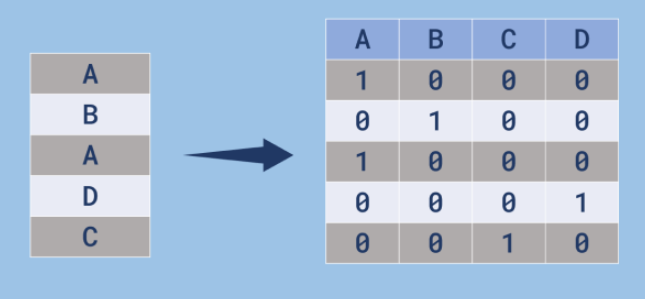

In [187]:
from sklearn.compose import make_column_transformer #generar un transformador de columnas
from sklearn.preprocessing import OneHotEncoder # la transformacion de arriba

In [188]:
columnas = X.columns

In [189]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['sexo_biologico','pais', 'tiene_tarjeta_credito', 'miembro_activo']
),
    remainder = 'passthrough',
    sparse_threshold=0)

In [190]:
X = one_hot.fit_transform(X) #ajustando nuestro modelos

In [191]:
one_hot.get_feature_names_out(columnas) # convierte la opcion en respeustas en una matriz

array(['onehotencoder__sexo_biologico_Mujer',
       'onehotencoder__pais_Alemania', 'onehotencoder__pais_España',
       'onehotencoder__pais_Francia',
       'onehotencoder__tiene_tarjeta_credito_1',
       'onehotencoder__miembro_activo_1', 'remainder__score_credito',
       'remainder__edad', 'remainder__años_de_cliente',
       'remainder__saldo', 'remainder__servicios_adquiridos',
       'remainder__salario_estimado'], dtype=object)

In [192]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas)) # muestra un dataframe con  los

,onehotencoder__sexo_biologico_Mujer,onehotencoder__pais_Alemania,onehotencoder__pais_España,onehotencoder__pais_Francia,onehotencoder__tiene_tarjeta_credito_1,onehotencoder__miembro_activo_1,remainder__score_credito,remainder__edad,remainder__años_de_cliente,remainder__saldo,remainder__servicios_adquiridos,remainder__salario_estimado
0,1.0,0.0,0.0,1.0,1.0,1.0,619.0,42.0,2.0,0.00,1.0,101348.88
1,1.0,0.0,1.0,0.0,0.0,1.0,608.0,41.0,1.0,83807.86,1.0,112542.58
2,1.0,0.0,0.0,1.0,1.0,0.0,502.0,42.0,8.0,159660.80,3.0,113931.57
3,1.0,0.0,0.0,1.0,0.0,0.0,699.0,39.0,1.0,0.00,2.0,93826.63
4,1.0,0.0,1.0,0.0,1.0,1.0,850.0,43.0,2.0,125510.82,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,1.0,1.0,0.0,771.0,39.0,5.0,0.00,2.0,96270.64
9996,0.0,0.0,0.0,1.0,1.0,1.0,516.0,35.0,10.0,57369.61,1.0,101699.77
9997,1.0,0.0,0.0,1.0,0.0,1.0,709.0,36.0,7.0,0.00,1.0,42085.58
9998,0.0,1.0,0.0,0.0,1.0,0.0,772.0,42.0,3.0,75075.31,2.0,92888.52


## Transformando la variable respuesta

Así como las variables explicativas, la variable objetivo también debe convertirse al formato numérico. Podemos representar una variable objetivo binaria como 0 o 1, donde 0 indica la ausencia de la característica de la variable y 1 representa su presencia.

In [193]:
from sklearn.preprocessing import LabelEncoder

In [194]:
label_encoder =  LabelEncoder()    #sirve solo para  una lista

In [195]:
y  = label_encoder.fit_transform(y) # convertitir si en 1 no en 0   variable objetivo

In [196]:
y

array([1, 0, 1, ..., 1, 1, 0])

# 3 Ajustando modelos

## Dividiendo los datos entre entrenamiento y prueba

Para comprender si el modelo realmente está aprendiendo de los datos, necesitamos hacer una separación de los datos entre entrenamiento y prueba. Los datos de **entrenamiento** se utilizan para ajustar el modelo, mientras que los datos de **prueba** sirven para verificar el aprendizaje del modelo en datos que no fueron utilizados en el momento del ajuste.

<a href="https://ibb.co/2749Chh3"><img src="https://i.ibb.co/Y7sC1QQB/train-test.png" alt="train-test" border="0"></a>

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
 X_train , X_test , y_train , y_test =train_test_split(X, y, stratify = y, random_state=42)  # strattify garantisa la misma porpocion entre si y no

## Modelo de referencia - Baseline

El modelo más simple de clasificar los datos es simplemente utilizar un algoritmo que asigna todas las clasificaciones a la clase que tiene mayor frecuencia. Este algoritmo sirve como un criterio de comparación para identificar si los otros modelos tienen un rendimiento mejor que la clasificación más simple posible.

In [199]:
from sklearn.dummy import DummyClassifier

In [200]:
dummy  = DummyClassifier()
dummy.fit(X_train, y_train) #mostrar todo lo que tenemos para entrenar


dummy.score(X_test, y_test) #puntaje de exactitud

0.7964

## Árboles de Decisión

El modelo de árbol de decisión es muy utilizado debido a su alta **explicabilidad** y **procesamiento rápido**, manteniendo un rendimiento bastante interesante.

Se basa en decisiones simples tomadas por el algoritmo, separando los datos mediante comparaciones de **menor** y **mayor** en los valores de las columnas de la base de datos.

In [201]:
from sklearn.tree import DecisionTreeClassifier #puede ver detras de camata

In [202]:
modelo_arbol = DecisionTreeClassifier(random_state=5)
modelo_arbol.fit(X_train, y_train)
modelo_arbol.score(X_train, y_train)

1.0

In [203]:
modelo_arbol.score(X_test,y_test)

0.7988

In [204]:
from sklearn.tree import plot_tree #ver el detras de camara
import matplotlib.pyplot as plt

```python
valores_columnas = ['onehotencoder__sexo_biologico_Mujer',
       'onehotencoder__pais_Alemania', 'onehotencoder__pais_España',
       'onehotencoder__pais_Francia',
       'onehotencoder__tiene_tarjeta_credito_1',
       'onehotencoder__miembro_activo_1', 'remainder__score_credito',
       'remainder__edad', 'remainder__años_de_cliente',
       'remainder__saldo', 'remainder__servicios_adquiridos',
       'remainder__salario_estimado']
```

In [205]:
valores_columnas = ['onehotencoder__sexo_biologico_Mujer',
       'onehotencoder__pais_Alemania', 'onehotencoder__pais_España',
       'onehotencoder__pais_Francia',
       'onehotencoder__tiene_tarjeta_credito_1',
       'onehotencoder__miembro_activo_1', 'remainder__score_credito',
       'remainder__edad', 'remainder__años_de_cliente',
       'remainder__saldo', 'remainder__servicios_adquiridos',
       'remainder__salario_estimado']

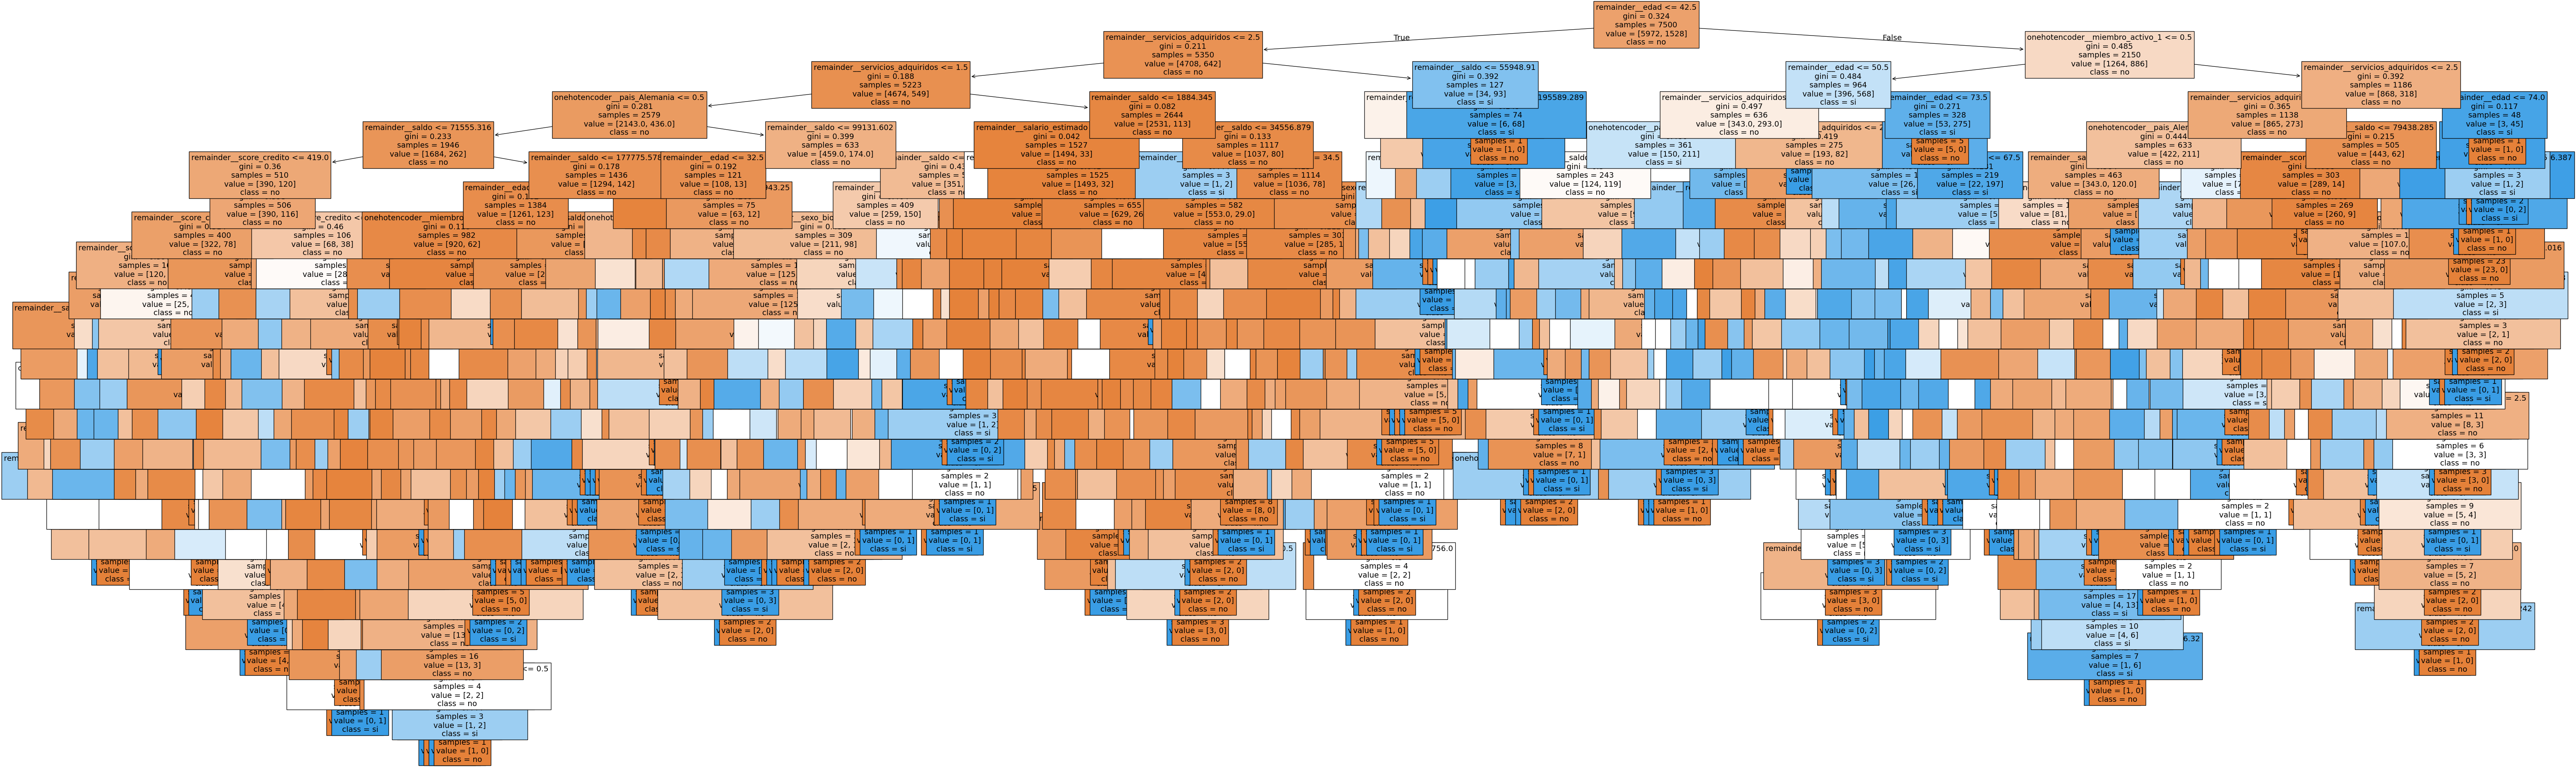

In [206]:
plt .figure(figsize=(80,25))
plot_tree(modelo_arbol, #recibe el modelo arbol
          fontsize=14, #tamaño de la letra
          feature_names=valores_columnas, #nombres de los atributos sera valore columnas
          class_names=['no','si'], # nombre de las clases
          filled=True); #falled diferenciar si y no
          #naranja  = no azul  :si

In [207]:
modelo_arbol =DecisionTreeClassifier(max_depth=3, random_state= 5) # ma_depth es el nivel de profundidad
modelo_arbol.fit(X_train, y_train) #datos de entrenamiento

DecisionTreeClassifier(max_depth=3, random_state=5)

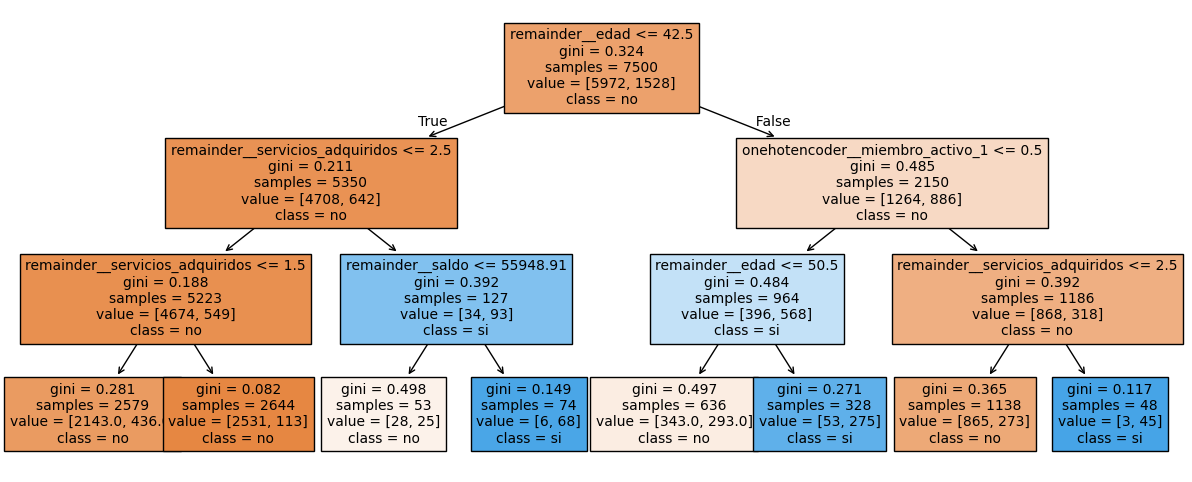

In [208]:
plt .figure(figsize=(15,6)) #distancia de observacion
plot_tree(modelo_arbol, #recibe el modelo arbol
          fontsize=10, #tamaño de la letra
          feature_names=valores_columnas, #nombres de los atributos sera valore columnas
          class_names=['no','si'], # nombre de las clases
          filled=True); #falled diferenciar si y no
          #naranja  = no azul  :si

# 4. Selección de modelos

## Normalizando los datos

Algunos algoritmos pueden asignar un mayor peso a los valores de las variables debido a la escala de los valores y no por la importancia de la clasificación de la variable objetivo. Por ejemplo, en una base de datos con las columnas **edad** y **salario**, el algoritmo puede dar un mayor peso de decisión a los valores del salario simplemente por estar en una escala mayor que los valores de la edad, y no porque la variable salario sea más importante que la variable edad.

En estos casos, necesitamos realizar una transformación en los datos para que estén en una misma escala, evitando que el algoritmo sea influenciado incorrectamente por los valores numéricos divergentes entre las variables.

$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

In [209]:
from sklearn.preprocessing import MinMaxScaler

In [210]:
normalizacion  = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)

In [211]:
pd.DataFrame(X_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,1.0,0.0,1.0,0.770,0.472973,0.8,0.557190,0.333333,0.852298
1,0.0,0.0,0.0,1.0,0.0,1.0,0.336,0.270270,0.3,0.409227,0.000000,0.811543
2,1.0,1.0,0.0,0.0,1.0,1.0,0.444,0.486486,0.9,0.438132,0.000000,0.978895
3,1.0,0.0,0.0,1.0,1.0,1.0,0.538,0.229730,0.4,0.406776,0.000000,0.102728
4,1.0,0.0,1.0,0.0,0.0,1.0,0.516,0.310811,0.1,0.377058,0.000000,0.562709
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0.0,1.0,0.0,0.0,1.0,0.0,0.404,0.432432,0.4,0.545179,0.000000,0.587524
7496,0.0,0.0,1.0,0.0,0.0,0.0,0.724,0.756757,0.5,0.000000,0.333333,0.757144
7497,1.0,0.0,0.0,1.0,1.0,1.0,0.634,0.256757,0.9,0.322975,0.333333,0.338648
7498,0.0,0.0,1.0,0.0,1.0,0.0,0.674,0.229730,0.8,0.454355,0.333333,0.111189


## KNN

El algoritmo KNN se basa en el cálculo de la distancia entre los registros de la base de datos y busca elementos que estén cerca unos de otros (vecinos) para tomar la decisión de clasificación.

Debido a que utiliza cálculos de distancia, este algoritmo está influenciado por la escala de las variables, y por eso es necesario realizar una transformación en los datos antes de utilizar este método.

In [212]:
from sklearn.neighbors import KNeighborsClassifier # los vecinos mas cercanos

In [213]:
knn = KNeighborsClassifier() #instancias
knn.fit(X_train_normalizado, y_train) # y no esta normalizada por que es  0 y 1

KNeighborsClassifier()

In [214]:
X_test_normalizado = normalizacion.transform(X_test) #normalizamos la prueba

In [215]:
knn.score(X_test_normalizado, y_test)

0.8148

## Escogiendo y serializando el mejor modelo

Al final de un proyecto de machine learning, debemos comparar los resultados de los modelos y elegir el que tenga el mejor rendimiento.

Podemos almacenar el modelo en un archivo serializado del tipo pickle para que sea utilizado en producción, es decir, en datos del mundo real para atender las necesidades del problema que necesita ser resuelto.

In [216]:
lista = [('dumy', dummy,X_test),('de arbol',modelo_arbol, X_test),('knn',knn,X_test_normalizado)]
for i in lista:
    print(f' La exatidud del modelo {i[0]} : {i[1].score(i[2],y_test)}')

 La exatidud del modelo dumy : 0.7964
 La exatidud del modelo de arbol : 0.8404
 La exatidud del modelo knn : 0.8148


In [217]:
import pickle  #exportar en binario un archivo

In [218]:
with open('modelo_onehotconder.pkl', 'wb') as archivo: # wb es el tipo de importacion
    pickle.dump(one_hot, archivo) # para crear el dump

In [219]:
with open('modelo_arbol.pkl', 'wb') as archivo: # wb es el tipo de importacion
    pickle.dump(modelo_arbol, archivo) # para crear el dump

```python
nuevo_dato = pd.DataFrame({
    'score_credito': [850],
    'pais':['Francia'],
    'sexo_biologico':['Hombre'],
    'edad': [27],
    'años_de_cliente': [3],
    'saldo': [56000],
    'servicios_adquiridos': [1],
    'tiene_tarjeta_credito': [1],
    'miembro _activo': [1],
    'salario_estimado': [85270.00]
})
```

In [220]:
nuevo_dato = pd.DataFrame({
    'score_credito': [850],
    'pais':['Francia'],
    'sexo_biologico':['Hombre'],
    'edad': [27],
    'años_de_cliente': [3],
    'saldo': [56000],
    'servicios_adquiridos': [1],
    'tiene_tarjeta_credito': [1],
    'miembro_activo': [1],
    'salario_estimado': [85270.00]
})

In [221]:
nuevo_dato = pd.DataFrame(nuevo_dato)
nuevo_dato

,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado
0,850,Francia,Hombre,27,3,56000,1,1,1,85270.0


In [222]:
modelo_one_hot = pd.read_pickle('modelo_onehotconder.pkl')
modelo_arbol =pd.read_pickle('modelo_arbol.pkl')

In [223]:
nuevo_dato = modelo_one_hot.transform(nuevo_dato)
modelo_arbol.predict(nuevo_dato)

array([0])